In [41]:
import pandas as pd
import numpy as np
import datetime
from openbb_terminal.sdk import openbb

import seaborn as sns

In [9]:
# define start and end for the range to pull data

# end date is going to be today
end = datetime.datetime.now()

# start is going to be how far back to go, here we use 10 years
start = end - datetime.timedelta(days=365*10)

aapl = openbb.stocks.load('AAPL', start_date=start, end_date=end)
aapl

Loading Daily data for AAPL with starting period 2013-12-02.

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
date,,,,,,,,
2013-12-02,17.471210,17.669404,17.246402,17.259239,17.259239,472544800,0.0,0.0
2013-12-03,17.480603,17.733592,17.461191,17.731712,17.731712,450968000,0.0,0.0
2013-12-04,17.706033,17.821569,17.559500,17.690378,17.690378,377809600,0.0,0.0
2013-12-05,17.929906,18.007869,17.734530,17.781181,17.781181,447580000,0.0,0.0
2013-12-06,17.715120,17.745178,17.520370,17.534458,17.534458,344352400,0.0,0.0
...,...,...,...,...,...,...,...,...
2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,0.0,0.0
2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,0.0,0.0
2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.0,0.0


In [10]:
#drop dividends and splits & reset the index
aapl_df = aapl.copy()
aapl_df = aapl_df.drop(columns=['Dividends', 'Stock Splits']).reset_index()
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume
0,2013-12-02,17.471210,17.669404,17.246402,17.259239,17.259239,472544800
1,2013-12-03,17.480603,17.733592,17.461191,17.731712,17.731712,450968000
2,2013-12-04,17.706033,17.821569,17.559500,17.690378,17.690378,377809600
3,2013-12-05,17.929906,18.007869,17.734530,17.781181,17.781181,447580000
4,2013-12-06,17.715120,17.745178,17.520370,17.534458,17.534458,344352400
...,...,...,...,...,...,...,...
2512,2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300
2513,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600
2514,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400
2515,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,42967700


<AxesSubplot: xlabel='date'>

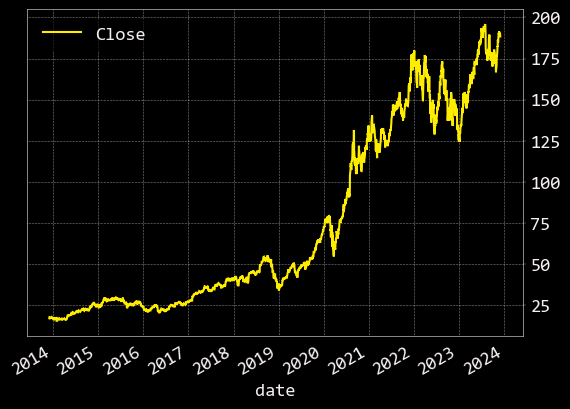

In [13]:
# take a quick look at the daily closing price over the timeframe selected

aapl_df.plot(kind='line',
             x='date',
             y='Close'
            
            )

---
## Add features

In [14]:
# Look at the distance from the SMA's in PERCENTAGE terms to aleviate any concern with a specific price value (round # for ex)

for ma in [10, 20, 30, 50, 100]:
    aapl_df[f'feat_dist_from_ma_{ma}'] = aapl_df['Close'] / aapl_df['Close'].rolling(ma).mean()-1
    
# Calculating the Distance from the Moving Average:

# This part of the code calculates how far (in percentage terms) the current closing price is from the moving average 
# The current 'Close' price is divided by the moving average of the 'Close' price. 
# Subtracting 1 from this quotient converts the ratio into a percentage difference. 
# A result of 0 indicates that the current price is exactly at the moving average, a positive value indicates the current price is above 
# the moving average, and a negative value indicates it's below.

In [15]:
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,feat_dist_from_ma_50,feat_dist_from_ma_100
0,2013-12-02,17.471210,17.669404,17.246402,17.259239,17.259239,472544800,NaN,NaN,NaN,NaN,NaN
1,2013-12-03,17.480603,17.733592,17.461191,17.731712,17.731712,450968000,NaN,NaN,NaN,NaN,NaN
2,2013-12-04,17.706033,17.821569,17.559500,17.690378,17.690378,377809600,NaN,NaN,NaN,NaN,NaN
3,2013-12-05,17.929906,18.007869,17.734530,17.781181,17.781181,447580000,NaN,NaN,NaN,NaN,NaN
4,2013-12-06,17.715120,17.745178,17.520370,17.534458,17.534458,344352400,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,0.005441,0.040669,0.056963,0.067959,0.047935
2513,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,0.002689,0.033515,0.053778,0.065149,0.047029
2514,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.002945,0.031127,0.054839,0.067056,0.050381
2515,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,42967700,-0.003494,0.020348,0.046725,0.060031,0.044626


In [16]:
# Look at the distance from the rolling daily high & low

for mm in [3, 5, 10, 15, 30, 50, 100]:  # so 3 would be the rolling 3 day high and low
    aapl_df[f'feat_dist_from_high_{mm}'] = aapl_df['Close'] / aapl_df['High'].rolling(mm).max()-1
    aapl_df[f'feat_dist_from_low_{mm}'] = aapl_df['Close'] / aapl_df['Low'].rolling(mm).min()-1

# Calculating the Distance from the rolling high and low price:

# This part of the code calculates how far (in percentage terms) the current closing price is from the rolling high&low 
# The current 'Close' price is divided by the rolling high/low. 
# Subtracting 1 from this quotient converts the ratio into a percentage difference. 
# A result of 0 indicates that the current price is exactly at the high/low, a positive value indicates the current price is above 
# the high/low, and a negative value indicates it's below.    
    
    
aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,...,feat_dist_from_high_10,feat_dist_from_low_10,feat_dist_from_high_15,feat_dist_from_low_15,feat_dist_from_high_30,feat_dist_from_low_30,feat_dist_from_high_50,feat_dist_from_low_50,feat_dist_from_high_100,feat_dist_from_low_100
0,2013-12-02,17.471210,17.669404,17.246402,17.259239,17.259239,472544800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-12-03,17.480603,17.733592,17.461191,17.731712,17.731712,450968000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-12-04,17.706033,17.821569,17.559500,17.690378,17.690378,377809600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-12-05,17.929906,18.007869,17.734530,17.781181,17.781181,447580000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-12-06,17.715120,17.745178,17.520370,17.534458,17.534458,344352400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,0.005441,0.040669,0.056963,...,-0.015342,0.035090,-0.015342,0.097319,-0.015342,0.148188,-0.015342,0.148188,-0.039110,0.148188
2513,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,0.002689,0.033515,0.053778,...,-0.016275,0.030291,-0.016275,0.078486,-0.016275,0.147100,-0.016275,0.147100,-0.040021,0.147100
2514,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.002945,0.031127,0.054839,...,-0.013114,0.022007,-0.013114,0.065267,-0.013114,0.150787,-0.013114,0.150787,-0.036935,0.150787
2515,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,42967700,-0.003494,0.020348,0.046725,...,-0.018452,0.008467,-0.018452,0.044218,-0.018452,0.144561,-0.018452,0.144561,-0.042145,0.144561


In [17]:
# price distance from a defined period --> time delay

for d in [1, 2, 3, 4, 5, 10, 15, 20, 30, 50, 100]:
    aapl_df[f'feat_price_distance_{d}'] = aapl_df['Close'] / aapl_df['Close'].shift(d)-1
    
    
# This loop iterates over a list of integers, each representing a different time delay (in days) for comparing the 'Close' prices.
# .shift(d): This function shifts the 'Close' prices down by d positions (or d days). 
# This means that for each row, it fetches the 'Close' price from d days ago. 
# For example, when d is 1, it will fetch the previous day's closing price for each row.
# So you can look at todays close as compared to what is was 1, 2, 3 ... days ago

aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,...,feat_price_distance_2,feat_price_distance_3,feat_price_distance_4,feat_price_distance_5,feat_price_distance_10,feat_price_distance_15,feat_price_distance_20,feat_price_distance_30,feat_price_distance_50,feat_price_distance_100
0,2013-12-02,17.471210,17.669404,17.246402,17.259239,17.259239,472544800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-12-03,17.480603,17.733592,17.461191,17.731712,17.731712,450968000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-12-04,17.706033,17.821569,17.559500,17.690378,17.690378,377809600,NaN,NaN,NaN,...,0.024980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2013-12-05,17.929906,18.007869,17.734530,17.781181,17.781181,447580000,NaN,NaN,NaN,...,0.002790,0.030241,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013-12-06,17.715120,17.745178,17.520370,17.534458,17.534458,344352400,NaN,NaN,NaN,...,-0.008814,-0.011124,0.015946,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,0.005441,0.040669,0.056963,...,-0.003514,-0.007730,0.001476,0.001370,0.042817,0.071241,0.139794,0.052627,0.082396,-0.004458
2513,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,0.002689,0.033515,0.053778,...,-0.007945,-0.004459,-0.008671,0.000527,0.018187,0.075800,0.129711,0.062567,0.085881,-0.007890
2514,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.002945,0.031127,0.054839,...,0.002263,-0.004757,-0.001259,-0.005484,0.030303,0.063722,0.119566,0.066757,0.071253,0.001197
2515,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,42967700,-0.003494,0.020348,0.046725,...,-0.002213,-0.003158,-0.010141,-0.006662,0.010297,0.042897,0.110379,0.070389,0.058913,0.006710


## Using %chg (the -1) keeps features generic over time scales

---
## Target
* predict if above the 20SMA in 5 days

In [19]:
# define the 20 SMA col
aapl_df['target_sma'] = aapl_df['Close'].rolling(20).mean()

# define if the close is above the 20ma col --> bool value
aapl_df['price_above_ma'] = aapl_df['Close'] > aapl_df['target_sma']

# define the target col for 5 days from now
# this brings the T or F up 5 rows (5 days) and gives a values of 0 or 1
aapl_df['target'] = aapl_df['price_above_ma'].astype(int).shift(-5)

aapl_df

,date,Open,High,Low,Close,Adj Close,Volume,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,...,feat_price_distance_5,feat_price_distance_10,feat_price_distance_15,feat_price_distance_20,feat_price_distance_30,feat_price_distance_50,feat_price_distance_100,target_sma,price_above_ma,target
0,2013-12-02,17.471210,17.669404,17.246402,17.259239,17.259239,472544800,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
1,2013-12-03,17.480603,17.733592,17.461191,17.731712,17.731712,450968000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
2,2013-12-04,17.706033,17.821569,17.559500,17.690378,17.690378,377809600,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
3,2013-12-05,17.929906,18.007869,17.734530,17.781181,17.781181,447580000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
4,2013-12-06,17.715120,17.745178,17.520370,17.534458,17.534458,344352400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2512,2023-11-24,190.869995,190.899994,189.250000,189.970001,189.970001,24048300,0.005441,0.040669,0.056963,...,0.001370,0.042817,0.071241,0.139794,0.052627,0.082396,-0.004458,182.545966,True,NaN
2513,2023-11-27,189.919998,190.669998,188.899994,189.789993,189.789993,40552600,0.002689,0.033515,0.053778,...,0.000527,0.018187,0.075800,0.129711,0.062567,0.085881,-0.007890,183.635532,True,NaN
2514,2023-11-28,189.779999,191.080002,189.399994,190.399994,190.399994,38415400,0.002945,0.031127,0.054839,...,-0.005484,0.030303,0.063722,0.119566,0.066757,0.071253,0.001197,184.652235,True,NaN
2515,2023-11-29,190.899994,192.089996,188.970001,189.369995,189.369995,42967700,-0.003494,0.020348,0.046725,...,-0.006662,0.010297,0.042897,0.110379,0.070389,0.058913,0.006710,185.593468,True,NaN


--- 
## Clean up the df for ML prep
## Define the train and test
* note for time series its better to split on a given date

In [20]:
aapl_df = aapl_df.copy()

In [21]:
# Drop nulls
aapl_df = aapl_df.dropna()

In [22]:
# Define feature columns
feat_cols = [col for col in aapl_df.columns if 'feat' in col]

#uses list comp to id all the columns with 'feat' in them
#generic form of list comp:
    # new_lsit = [some_expression for item in iterable if some_condition]

feat_cols

['feat_dist_from_ma_10',
 'feat_dist_from_ma_20',
 'feat_dist_from_ma_30',
 'feat_dist_from_ma_50',
 'feat_dist_from_ma_100',
 'feat_dist_from_high_3',
 'feat_dist_from_low_3',
 'feat_dist_from_high_5',
 'feat_dist_from_low_5',
 'feat_dist_from_high_10',
 'feat_dist_from_low_10',
 'feat_dist_from_high_15',
 'feat_dist_from_low_15',
 'feat_dist_from_high_30',
 'feat_dist_from_low_30',
 'feat_dist_from_high_50',
 'feat_dist_from_low_50',
 'feat_dist_from_high_100',
 'feat_dist_from_low_100',
 'feat_price_distance_1',
 'feat_price_distance_2',
 'feat_price_distance_3',
 'feat_price_distance_4',
 'feat_price_distance_5',
 'feat_price_distance_10',
 'feat_price_distance_15',
 'feat_price_distance_20',
 'feat_price_distance_30',
 'feat_price_distance_50',
 'feat_price_distance_100']

### Training data definition
* here we will define the train & test instead of using the train/test/split method

In [23]:
# Recall we previously defined start as now - 10 years, now we can add to that how many years of training data we want
train_until = start + datetime.timedelta(days=365*7)
train_until

datetime.datetime(2020, 11, 30, 13, 47, 13, 810462)

In [27]:
# Define the training df's
x_train = aapl_df[aapl_df['date'] < train_until][feat_cols]  # feature cols used for training
y_train = aapl_df[aapl_df['date'] < train_until]['target']  # response of the target column (1 or 0 5 days out) for training period

x_train
#y_train

,feat_dist_from_ma_10,feat_dist_from_ma_20,feat_dist_from_ma_30,feat_dist_from_ma_50,feat_dist_from_ma_100,feat_dist_from_high_3,feat_dist_from_low_3,feat_dist_from_high_5,feat_dist_from_low_5,feat_dist_from_high_10,...,feat_price_distance_2,feat_price_distance_3,feat_price_distance_4,feat_price_distance_5,feat_price_distance_10,feat_price_distance_15,feat_price_distance_20,feat_price_distance_30,feat_price_distance_50,feat_price_distance_100
100,0.099147,0.108700,0.109334,0.113268,0.105742,-0.002786,0.059494,-0.002786,0.132787,-0.002786,...,0.046357,0.132140,0.117341,0.118456,0.143339,0.117089,0.106602,0.132269,0.091215,0.084205
101,0.081751,0.099711,0.101550,0.107963,0.101864,-0.006124,0.050305,-0.006124,0.129431,-0.006124,...,0.035651,0.043257,0.128786,0.114031,0.135428,0.131545,0.103569,0.124521,0.088862,0.052189
102,0.063649,0.090648,0.093407,0.101955,0.097116,-0.015582,0.030635,-0.015582,0.052361,-0.015582,...,-0.006733,0.031734,0.039312,0.124517,0.139258,0.127331,0.089431,0.110444,0.080771,0.050659
103,0.052407,0.088296,0.091921,0.102323,0.099149,-0.013263,0.008732,-0.013263,0.048798,-0.013263,...,-0.001435,-0.004394,0.034165,0.041760,0.139631,0.115326,0.090185,0.113353,0.100694,0.047756
104,0.041826,0.084951,0.089668,0.101850,0.100460,-0.011428,0.010608,-0.011428,0.034984,-0.011428,...,0.004220,0.000422,-0.002542,0.036088,0.128853,0.132001,0.099835,0.120825,0.115655,0.064475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1757,-0.036378,-0.018577,-0.023108,-0.012146,0.015525,-0.043759,0.000879,-0.056518,0.000879,-0.059013,...,-0.040374,-0.035415,-0.046402,-0.053616,-0.021235,0.048510,-0.008723,-0.083228,-0.011387,0.255138
1758,-0.024545,-0.006672,-0.010162,-0.000663,0.025284,-0.030311,0.022915,-0.038808,0.022915,-0.048103,...,-0.018493,-0.029248,-0.024231,-0.035346,-0.006898,0.044628,-0.010560,-0.047327,-0.001483,0.236611
1759,-0.014373,-0.001417,-0.001354,0.006085,0.030813,-0.013518,0.030553,-0.025449,0.030553,-0.040995,...,0.019148,-0.011164,-0.021999,-0.016945,-0.028956,0.011137,0.045236,-0.040926,0.036566,0.249722
1760,-0.007407,0.002769,0.004593,0.009812,0.033805,-0.007660,0.035527,-0.018355,0.035527,-0.036367,...,0.012330,0.024067,-0.006392,-0.017279,-0.021978,-0.018809,0.012757,-0.032465,0.058466,0.227173


In [29]:
# Define the testing period df's

x_test = aapl_df[aapl_df['date'] >= train_until][feat_cols]  # feature cols used for test period
y_test = aapl_df[aapl_df['date'] >= train_until]['target']  # response of the target column (1 or 0 5 days out) for test period

x_test
y_test

1762    1.0
1763    1.0
1764    1.0
1765    1.0
1766    1.0
       ... 
2507    1.0
2508    1.0
2509    1.0
2510    1.0
2511    1.0
Name: target, Length: 750, dtype: float64

---
## ML Model with Random Forest Classifier
* model --> fit --> predict

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score

In [31]:
# Model - define the model instance

clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=3,
    random_state=42,
    class_weight='balanced'

)

#### model explanation
* Random forests are an ensemble learning method, which means they operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) of the individual trees.
* n_estimators=100: This parameter specifies the number of trees in the forest of the model. Here, it's set to 100, meaning that 100 different decision trees will be built and used in the ensemble. A higher number of trees generally improves the performance of the model but also increases the computational cost.
* max_depth=3: This parameter determines the maximum depth of each tree. The depth of a tree is the length of the longest path from a root to a leaf. A depth of 3 means that each decision tree in the forest can have at most three levels. Limiting the depth of the trees can help prevent the model from overfitting, although it might also restrict the ability of the model to capture more complex patterns in the data.
* random_state=42: This parameter is used for initializing the internal random number generator, which will decide the splitting of the data at each node and the sampling of the data for building each tree. Setting random_state to a fixed number ensures that the results are reproducible. 
* class_weight='balanced': This parameter is used to handle imbalanced datasets. When set to 'balanced', the algorithm will automatically adjust weights inversely proportional to class frequencies in the input data. This can help improve model performance on imbalanced data by giving more importance to the minority class.

In [32]:
# Fit - fit the model to the training data --> this is also called training the model

clf.fit(x_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=3, random_state=42)

#### Fit explanation
* When you call clf.fit(x_train, y_train), the random forest model will use the training data (x_train) and the corresponding labels (y_train) to learn how to classify similar data points. It does this by building a number of decision trees, each based on random subsets of features and data points (rows), and then averaging their predictions to improve the predictive accuracy and control over-fitting.

In [34]:
# Predict - use the model for predictions

y_train_pred = clf.predict(x_train)
y_test_pred = clf.predict(x_test)

#### predict explanation
* generate predictions from your trained model, first on the training dataset (to see how well the model has learned from the data it was trained on) and then on the test dataset (to evaluate the model's performance on new, unseen data). This is a common practice in machine learning to understand the model's behavior and to check for issues like overfitting, where a model might perform well on training data but poorly on new data.

---
## Determine accuracy and precision of the model

In [35]:
# Training accuracy & precision
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred)

# Test acc & prec
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred)

In [38]:
print(f'Training Accuracy: {train_accuracy}')
print(f'Training Precision:{train_precision}')
print('-------')
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Precision:{test_precision}')

Training Accuracy: 0.7809867629362214
Training Precision:0.8500486854917235
-------
Test Accuracy: 0.756
Test Precision:0.8166259168704156


#### accuracy & prescision explanation
* accuracy_score: This is a function from scikit-learn that calculates the accuracy of a model. Accuracy is one of the most common metrics for evaluating classification models and is defined as the proportion of correct predictions among the total number of cases examined.
* y_test: This is the true labels for your test dataset. These are the actual, observed classifications that your model is trying to predict.
* y_test_pred: These are the predicted labels for your test dataset, generated by your model.
---
* precision_score: This is another function from scikit-learn, used to calculate the precision of the model. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. It is a key metric when the cost of false positives is high.

---
## Confusion Matrix
* A confusion matrix is a table often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. It's a fundamental tool in the evaluation of machine learning models, particularly in supervised learning, and it allows the visualization of the performance of an algorithm.
* The confusion matrix itself is a simple layout of four different combinations of predicted and actual values, typically formatted as a 2x2 matrix for binary classification tasks. These four terms are:
    * True Positives (TP): The cases in which the model correctly predicted the positive class.
    * True Negatives (TN): The cases in which the model correctly predicted the negative class.
    * False Positives (FP): The cases in which the model incorrectly predicted the positive class (also known as a "Type I error").
    * False Negatives (FN): The cases in which the model incorrectly predicted the negative class (also known as a "Type II error").


<img src="confusion-matrix.webp" alt="Example Image" width="500" height="500">

* Interpretation:
    * High TP and TN values are desirable as they indicate correct classifications
    * High FP values indicate many Type I errors, where the model is seeing things that aren't there.
    * High FN values indicate many Type II errors, where the model is missing things that are there.
    
* Use:
    * Accuracy: The overall correctness of the model. (TP+TN)/(TP+TN+FP+FN)
    * Precision: The accuracy of positive predictions. TP/(TP+FP)
    * Recall (Sensitivity or True Positive Rate): The fraction of positives that were correctly identified. TP/(TP+FN)
    * F1 Score: A weighted average of precision and recall.
    * Specificity (True Negative Rate): The fraction of negatives that were correctly identified. TN/(TN+FP)

In [42]:
from sklearn.metrics import confusion_matrix

In [48]:
# define a function to plot the confusion matrix

def plot_conf_matrix(y_values, y_pred, title, normalize, ax): # defs funct that takes in y values (test & train), y_pred values, a title, normalize (thiswill be T or F)
    
    if normalize:  # if we want to normalize so its True when called (see above), normalize gives %'s
        cm = confusion_matrix(y_values, y_pred, normalize='pred')
        sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', ax=ax)
    else:
        cm = confusion_matrix(y_values, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
        
    ax.set_title(title)
    ax.set_ylabel('True label')
    ax.set_xlabel('Predicted label')
    
    
    return

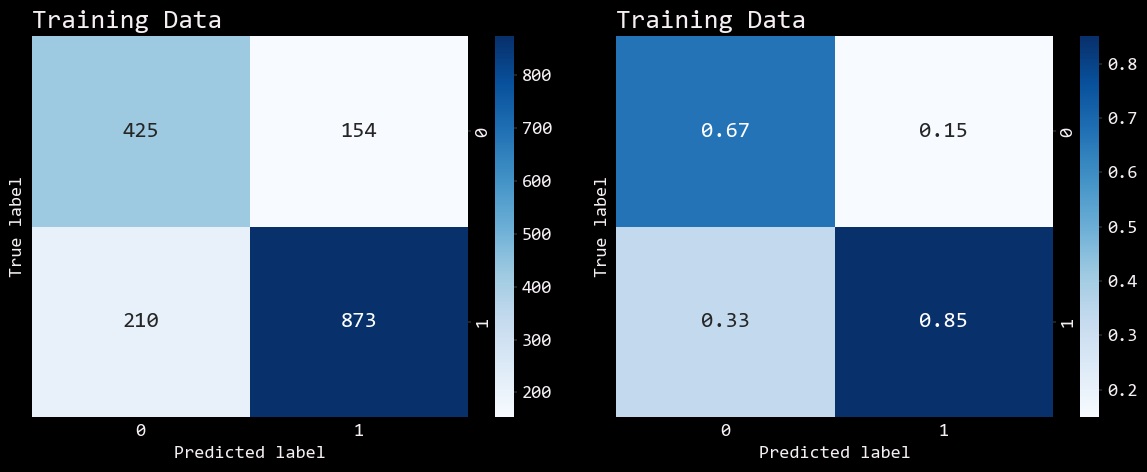

In [50]:
# Plot the training side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot for non-normalized data on the first subplot
plot_conf_matrix(y_train, y_train_pred, 'Training Data', False, ax1)

# Plot for normalized data on the second subplot
plot_conf_matrix(y_train, y_train_pred, 'Training Data', True, ax2)

plt.tight_layout()  # Adjust layout
plt.show()


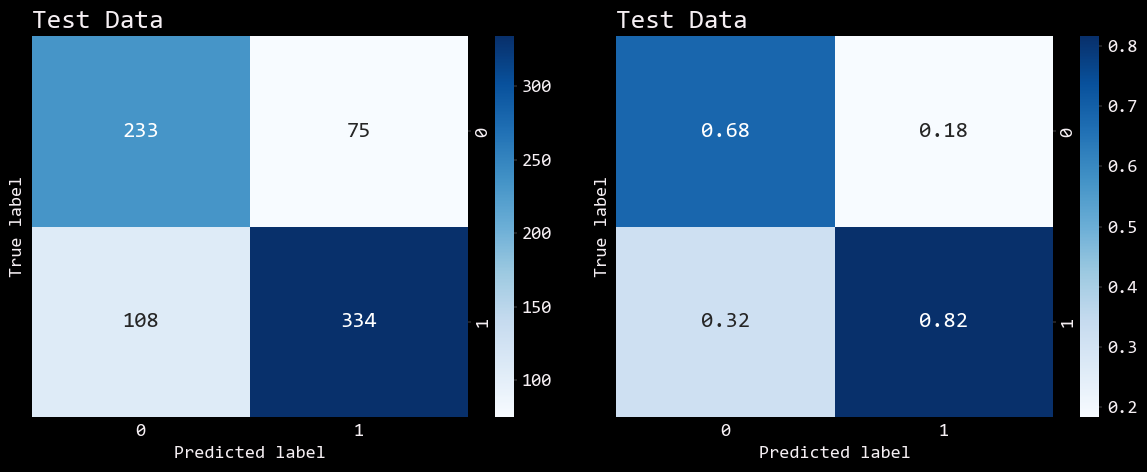

In [51]:
# plot the testing data side by side

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot for non-normalized data on the first subplot
plot_conf_matrix(y_test, y_test_pred, 'Test Data', False, ax1)

# Plot for normalized data on the second subplot
plot_conf_matrix(y_test, y_test_pred, 'Test Data', True, ax2)

plt.tight_layout()  # Adjust layout
plt.show()

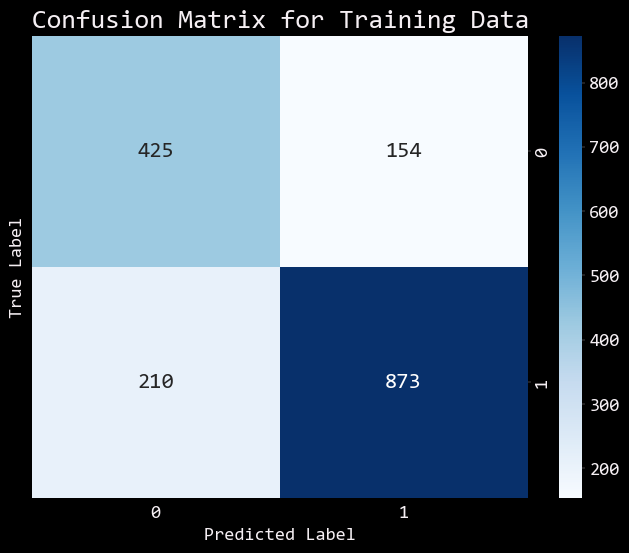

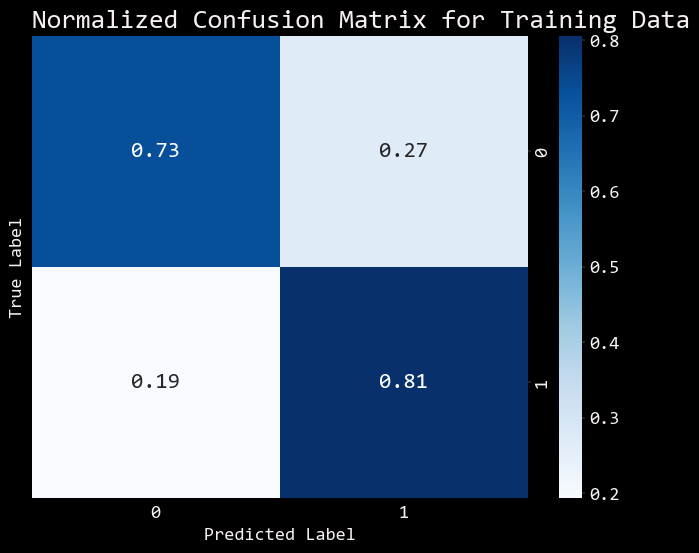

In [52]:
# Plotting without the function training data

# Assuming y_train are your true labels and y_train_pred are your model's predictions
cm = confusion_matrix(y_train, y_train_pred)

# Plotting non-normalized confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Training Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Plotting normalized confusion matrix
# Normalize by row (i.e., by the number of true labels in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues')
plt.title('Normalized Confusion Matrix for Training Data')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


## Precision Curve
* effect of model probability on precision
* A precision curve is a tool used in binary classification to understand the relationship between the threshold for predicting the positive class and the precision of the model. As the threshold varies, it affects the model's precision, and plotting this relationship helps in choosing an optimal threshold for making predictions
* Ideally, you want to see this trending up, and it gives a good idea of the sort of threshold that may be useful to use for a desired precision.

In [64]:
# Define function to calc and plot precision curve
def get_precision_curve(clf, x, y, title):
    
    y_scores = clf.predict_proba(x)[:, 1]
    # This method of the classifier clf returns the probability estimates for all classes. 
    # For a binary classification, it returns a two-column array where the first column is 
    # the probability of the class being '0', and the second is the probability of the class being '1'.
    # [:, 1]: This slices the array to get only the probabilities of the positive class ('1')
    # y_scores: This variable now holds the predicted probabilities that each instance in x belongs to the positive class.
    
    thresholds = np.linspace(0, 1, 100) # generates 100 evenly spaced thresholds between 0 and 1, These thresholds will be used to determine at what probability cutoff a sample should be classified as positive.
    precision = []
    
    for t in thresholds:
        y_pred_threshold = (y_scores >= t).astype(int)
        # For each threshold, this line creates a binary prediction array where each score in y_scores is compared to t. 
        # If y_scores is greater than or equal to t, it's considered a positive prediction (1); otherwise, it's a negative prediction (0).
        precision.append(precision_score(y, y_pred_threshold, zero_division=0))
        
    plt.plot(thresholds, precision, 'b.')
    plt.xlabel('Threshold')
    plt.ylabel('Precision')
    plt.title(title)
    #plt.grid(True)
    plt.show()
    
    return

#### Further explanation 
* clf.predict_proba(x) - Imagine you have a machine (clf, your classifier) that can make predictions. You give it some data (x), and it must decide if each piece of data belongs to Class '0' or Class '1' (like saying if an animal is a cat or a dog).
* This machine is a bit special because instead of just saying "this is a cat" or "this is a dog," it gives you its confidence in percentages. For example, it might say, "I'm 70% sure this is a cat and 30% sure this is a dog."
* So, for each piece of data you give it, it returns two numbers: the first number is its confidence that the data is Class '0' (like being a cat), and the second number is its confidence that the data is Class '1' (like being a dog).
---
* [:, 1] - The [:, 1] part is like telling the machine, "For each piece of data, only tell me the second number (the dog percentage)."
* It's a way of filtering the information to only get the machine's confidence about the data being Class '1' (dog).
---
* y_scores - Finally, you store all these dog percentages in a box named y_scores.
* ach number in y_scores tells you how confident the machine is that each piece of data is a dog. Higher numbers mean more confidence that it's a dog.
---
* precision_score(y, y_pred_threshold, zero_division=0) - Calculates the precision score for these predictions. Precision is the ratio of true positive predictions to the total number of positive predictions. zero_division=0 handles the case where the denominator (total number of positive predictions) is zero by returning 0.
---
* Threshold
    * Imagine you're playing a game where you have to guess whether a hidden object is a ball or a cube. Instead of just guessing blindly, you have a magic scale that tells you the likelihood of the object being a ball. If the likelihood is high (say 90%), it's probably a ball, but if it's low (say 10%), it's probably a cube.
    * Now, the threshold is like a rule you set for yourself to decide when to guess "ball" or "cube." For example, you might set a threshold of 50%. 
    * This means:
        * If the magic scale says the likelihood of the object being a ball is more than 50%, you'll guess "ball."
        * If the likelihood is less than 50%, you'll guess "cube."
        * So, the threshold is a cutoff point you choose. It helps you make a decision based on the likelihood given by the magic scale.
    * The "magic scale" is the classifier's predicted probability (like the clf.predict_proba(x)[:, 1], which gives the probability of each instance being in class '1').
    * The "threshold" is the probability cutoff you set to decide between different classes (like ball or cube, or in a typical classifier, class '0' or class '1').
     * If the predicted probability is higher than the threshold, you classify the instance as class '1'; if it's lower, you classify it as class '0'.
    * By changing this threshold, you can make your classification criteria more strict or more lenient. For example, a higher threshold (like 70%) means you'll only guess "ball" if you're quite sure, while a lower threshold (like 30%) means you're more willing to guess "ball" even if you're not very sure.


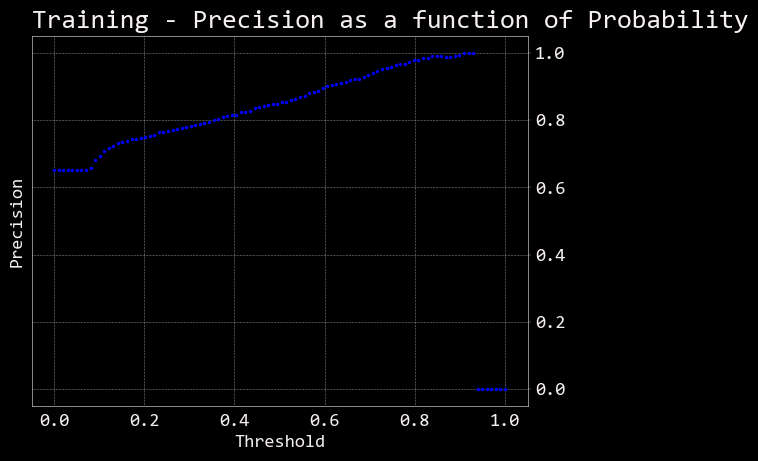

In [65]:
# Call the function on training data
get_precision_curve(clf, x_train, y_train, 'Training - Precision as a function of Probability')

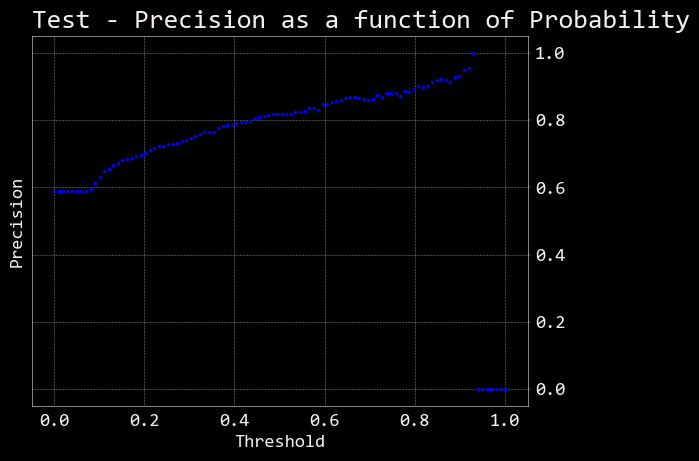

In [67]:
# Call the function on test data
get_precision_curve(clf, x_test, y_test, 'Test - Precision as a function of Probability')

---
## Feature Importance
* Feature importance in machine learning models, particularly in tree-based models like Random Forests and Gradient Boosting, provides a score that indicates the relative importance of each feature in the prediction of the target variable. Here's how the feature importance is generally computed in these models:
    * Random Forests: In Random Forest, feature importance is calculated based on how much each feature decreases the impurity of the split (commonly measured by Gini impurity or entropy in classification, and variance in regression). The process goes as follows:
        * Each tree in the Random Forest is constructed from a bootstrap sample from the original dataset.
        * At each node of a tree, a subset of features is randomly chosen to make a split.
        * The feature that most effectively splits the data (i.e., the feature that results in the largest decrease in impurity) is used to split the node.
        * After the forest is built, the model calculates the average decrease in impurity for each feature across all trees. This average decrease is the feature's importance.
    * Gradient Boosting Machines (GBM): In GBM and its variants like XGBoost or LightGBM, feature importance is also calculated based on the contribution of each feature to each decision tree in the ensemble. However, the method slightly differs:
        * In these models, trees are built sequentially, with each new tree attempting to correct the errors of the previous ones.
        * The feature importance is often computed as the total reduction of the loss function brought by that feature or as the total gain of purity from splitting on the feature across all trees.
---
* The important thing to note is that these importance scores are a heuristic and can vary between different types of models. They give an insight into which features the model is most reliant on for making predictions, but they don't necessarily imply causality.
* Correlated Features: If two features are highly correlated, the importance can be unfairly distributed between them or assigned to one over the other, not truly representing their individual predictive power.
* Scale and Measurement: The scale of the feature or how it's measured can affect its importance. Preprocessing steps like normalization or standardization can sometimes change the feature importance landscape.

In [71]:
# Call the feature importances on the clf model (note the _)
feature_importances = clf.feature_importances_
feature_importances

array([0.1898119 , 0.18573454, 0.07554757, 0.00212128, 0.00222734,
       0.0017522 , 0.00164848, 0.02563143, 0.00288603, 0.09623143,
       0.01018441, 0.074701  , 0.02622708, 0.02293112, 0.02251413,
       0.01076499, 0.00810459, 0.00301088, 0.00166133, 0.0012918 ,
       0.00095557, 0.0074321 , 0.02160467, 0.04643049, 0.07592463,
       0.04901698, 0.02370638, 0.00391646, 0.00176156, 0.00426764])

#### explanation
* attribute that stores the importance of each feature used in the model. The importance gives you a score for each feature of your data, the higher the score more important the feature.

In [73]:
# Sort the features -> np array so use argsort, [::-1] for reverse -- high to low
sorted_indicies = feature_importances.argsort()[::-1]
sorted_indicies

array([ 0,  1,  9, 24,  2, 11, 25, 23, 12,  7, 26, 13, 14, 22, 15, 10, 16,
       21, 29, 27, 17,  8,  4,  3, 28,  5, 18,  6, 19, 20])

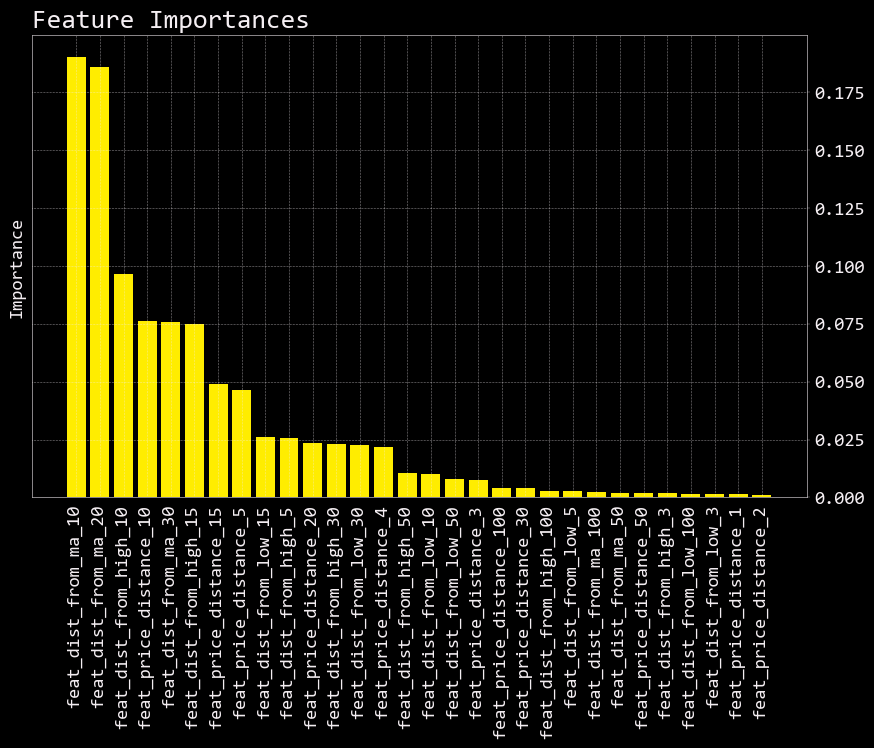

In [75]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), feature_importances[sorted_indicies], align='center')
plt.xticks(range(x_train.shape[1]), x_train.columns[sorted_indicies], rotation=90)
plt.ylabel('Importance')
plt.show()

---
## SHAP Plot
* In SHAP (SHapley Additive exPlanations) summary plots, particularly those used with classification models that predict binary outcomes (Class 0 and Class 1), the colors of the bars (or features in other types of SHAP plots) represent the impact of each feature value on the model's prediction for each class.
* Red (Class 1): When a feature in a specific instance (row of your dataset) has a red SHAP value, it means that the value of this feature is pushing the model's prediction more towards Class 1. The length of the red segment on the bar represents the magnitude of this push. A longer red segment indicates a stronger influence of this feature in predicting Class 1 for that instance.
* Blue (Class 0): Conversely, a blue SHAP value indicates that the feature is pushing the model's prediction more towards Class 0. Again, the length of the blue segment shows the strength of this influence.
* In summary, the colors on the SHAP summary plot bars help you understand how different feature values are influencing the model's predictions in terms of moving towards one class or the other in a binary classification setting. This is valuable for interpreting the behavior of complex models and understanding the underlying factors that drive predictions.

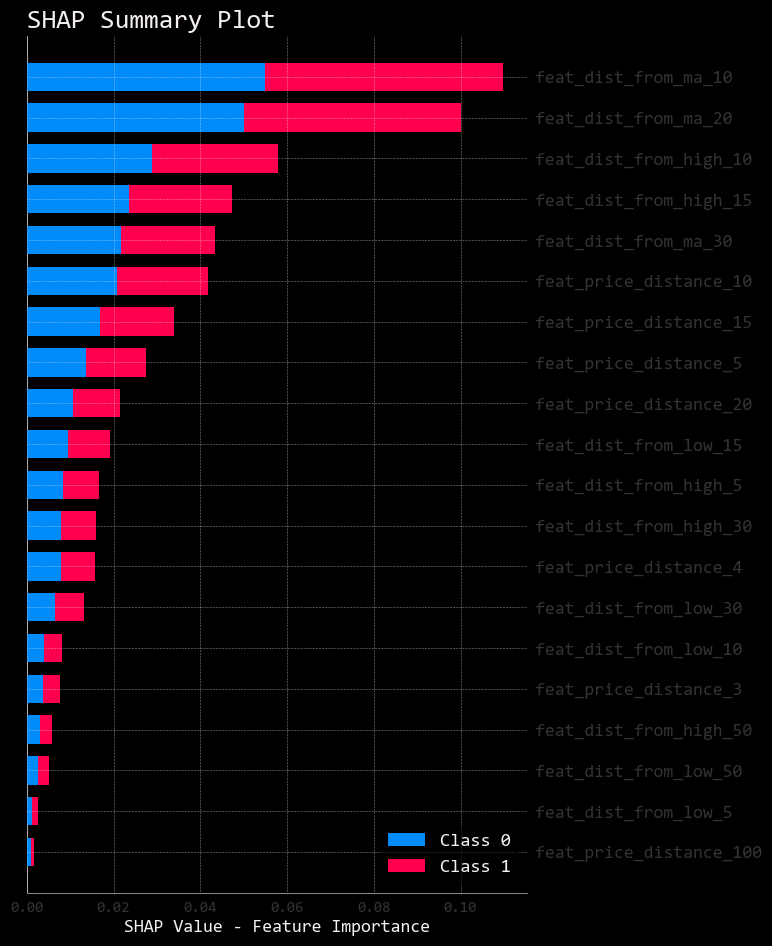

In [84]:
# Can also use a shap plot

# Initialize a SHAP explainer with the random forest model
explainer = shap.TreeExplainer(clf)

# Compute SHAP values for the training data
shap_values = explainer.shap_values(x_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, x_train, plot_type="bar", show=False)


# below modifies the standard output so can move the legend & add title
# Access the current matplotlib figure and axes
fig = plt.gcf() #plt.gcf() is get current figure --> gets the shap plot
ax = fig.get_axes() #this gets the axes from the figure (plot from previous)

# Add a title to your plot
if ax:
    ax[0].set_title("SHAP Summary Plot")
    
    # Set the Y-axis label
    ax[0].set_xlabel("SHAP Value - Feature Importance")

# Assuming the legend is the last artist in the axes, get the legend
if ax and ax[0].get_legend() is not None:
    legend = ax[0].get_legend()

    # Remove the original legend
    legend.remove()

    # Create a new legend and place it in the lower right corner
    # Adjust the bbox_to_anchor values as needed for exact placement
    ax[0].legend(loc='lower right', bbox_to_anchor=(1, 0))

# Show the plot with the new legend position
plt.show()